In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
dfs = [pd.read_csv('../input/heartbeat/mitbih_train.csv'),pd.read_csv('../input/heartbeat/mitbih_test.csv')]

In [3]:
for df in dfs:
    df.columns=list(range(len(df.columns)))


In [4]:
train = dfs[0].rename({187: 'Label'}, axis=1)
test = dfs[1].rename({187: 'Label'}, axis=1)


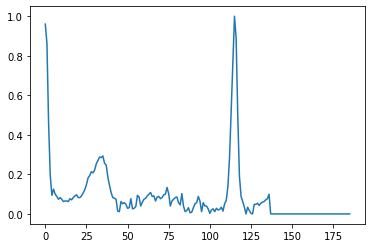

In [5]:
plt.plot(train.iloc[0,:186])

In [6]:
count=train['Label'].value_counts()
print(count)

0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: Label, dtype: int64


In [7]:
count=test['Label'].value_counts()
print(count)

0.0    18117
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: Label, dtype: int64


In [8]:
from sklearn.utils import resample
df_1=train[train['Label']==1]
df_2=train[train['Label']==2]
df_3=train[train['Label']==3]
df_4=train[train['Label']==4]
df_0=(train[train['Label']==0]).sample(n=35000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=35000,random_state=42)
df_2_upsample=resample(df_2,replace=True,n_samples=35000,random_state=42)
df_3_upsample=resample(df_3,replace=True,n_samples=35000,random_state=42)
df_4_upsample=resample(df_4,replace=True,n_samples=35000,random_state=42)

train=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [9]:
df_1=test[test['Label']==1]
df_2=test[test['Label']==2]
df_3=test[test['Label']==3]
df_4=test[test['Label']==4]
df_0=(test[test['Label']==0]).sample(n=15000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=15000,random_state=42)
df_2_upsample=resample(df_2,replace=True,n_samples=15000,random_state=42)
df_3_upsample=resample(df_3,replace=True,n_samples=15000,random_state=42)
df_4_upsample=resample(df_4,replace=True,n_samples=15000,random_state=42)

test=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [10]:
count=train['Label'].value_counts()
print(count)

0.0    35000
4.0    35000
3.0    35000
1.0    35000
2.0    35000
Name: Label, dtype: int64


In [11]:
count=test['Label'].value_counts()
print(count)

0.0    15000
4.0    15000
3.0    15000
1.0    15000
2.0    15000
Name: Label, dtype: int64


In [12]:
x_train=train.drop('Label',axis=1)
y_train=train['Label']

In [13]:
x_test=test.drop('Label',axis=1)
y_test=test['Label']

In [14]:
from sklearn.ensemble import AdaBoostClassifier   
X = train.drop(['Label'],axis=1)
Y = train['Label']
AdaBoost = AdaBoostClassifier(n_estimators=400,learning_rate=1)
AdaBoost.fit(x_train,y_train)
prediction = AdaBoost.predict(x_test)

In [15]:
def speci(cm):
    total=sum(sum(cm))
    sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]+cm[0,3]+cm[0,4])
    print('Sensitivity of  Non-ecotic beats (normal beat) ', sensitivity1 )
    specificity1 = (cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4])/(total-(cm[0,0]+cm[0,1]+cm[0,2]+cm[0,3]+cm[0,4]))
    print('Specificity of  Non-ecotic beats (normal beat) ', specificity1)
    sensitivity1 = cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]+cm[1,3]+cm[1,4])
    print('Sensitivity of  Supraventricular ectopic beats ', sensitivity1 )
    specificity1 = (cm[0,0]+cm[2,2]+cm[3,3]+cm[4,4])/(total-(cm[1,0]+cm[1,1]+cm[1,2]+cm[1,3]+cm[1,4]))
    print('Specificity of  Supraventricular ectopic beats ', specificity1)
    sensitivity1 = cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2]+cm[2,3]+cm[2,4])
    print('Sensitivity of  Ventricular ectopic beats  ', sensitivity1 )
    specificity1 = (cm[1,1]+cm[0,0]+cm[3,3]+cm[4,4])/(total-(cm[2,0]+cm[2,1]+cm[2,2]+cm[2,3]+cm[2,4]))
    print('Specificity of  Ventricular ectopic beats ', specificity1)
    sensitivity1 = cm[3,3]/(cm[3,0]+cm[3,1]+cm[3,2]+cm[3,3]+cm[3,4])
    print('Sensitivity of  Fusion Beats ', sensitivity1 )
    specificity1 = (cm[1,1]+cm[2,2]+cm[0,0]+cm[4,4])/(total-(cm[3,0]+cm[3,1]+cm[3,2]+cm[3,3]+cm[3,4]))
    print('Specificity of  Fusion Beats ', specificity1)
    sensitivity1 = cm[4,4]/(cm[4,0]+cm[4,1]+cm[4,2]+cm[4,3]+cm[4,4])
    print('Sensitivity of  Unknown Beats ', sensitivity1 )
    specificity1 = (cm[1,1]+cm[2,2]+cm[3,3]+cm[0,0])/(total-(cm[4,0]+cm[4,1]+cm[4,2]+cm[4,3]+cm[4,4]))
    print('Specificity of  Unknown Beats ', specificity1)
    

In [16]:
cm = metrics.confusion_matrix(y_test, prediction)
print(cm)
print(metrics.classification_report(y_test, prediction))
accuracy = metrics.accuracy_score(y_test, prediction)
print("Accuracy:",accuracy)
speci(cm)

[[ 5112  6429  1873   954   632]
 [ 1981 11111  1228   397   283]
 [  444   575 11167   790  2024]
 [ 1043   494  2070 11295    98]
 [  241   110   400     0 14249]]
              precision    recall  f1-score   support

         0.0       0.58      0.34      0.43     15000
         1.0       0.59      0.74      0.66     15000
         2.0       0.67      0.74      0.70     15000
         3.0       0.84      0.75      0.79     15000
         4.0       0.82      0.95      0.88     15000

    accuracy                           0.71     75000
   macro avg       0.70      0.71      0.69     75000
weighted avg       0.70      0.71      0.69     75000

Accuracy: 0.7057866666666667
Sensitivity of  Non-ecotic beats (normal beat)  0.3408
Specificity of  Non-ecotic beats (normal beat)  0.7970333333333334
Sensitivity of  Supraventricular ectopic beats  0.7407333333333334
Specificity of  Supraventricular ectopic beats  0.69705
Sensitivity of  Ventricular ectopic beats   0.7444666666666667
Specific

In [17]:
from sklearn.ensemble import GradientBoostingClassifier 
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
GB.fit(x_train,y_train)
GBpred = GB.predict(x_test)

In [18]:
GBcm = metrics.confusion_matrix(y_test, GBpred)
print(GBcm)
print(metrics.classification_report(y_test, GBpred))
GBaccuracy = metrics.accuracy_score(y_test, GBpred)
print("Accuracy:",GBaccuracy)
speci(GBcm)

[[10904  1773  1123   907   293]
 [ 3100 10594   575   451   280]
 [  952   462 12526   835   225]
 [  910    95   658 13239    98]
 [  238    57   212    52 14441]]
              precision    recall  f1-score   support

         0.0       0.68      0.73      0.70     15000
         1.0       0.82      0.71      0.76     15000
         2.0       0.83      0.84      0.83     15000
         3.0       0.86      0.88      0.87     15000
         4.0       0.94      0.96      0.95     15000

    accuracy                           0.82     75000
   macro avg       0.82      0.82      0.82     75000
weighted avg       0.82      0.82      0.82     75000

Accuracy: 0.82272
Sensitivity of  Non-ecotic beats (normal beat)  0.7269333333333333
Specificity of  Non-ecotic beats (normal beat)  0.8466666666666667
Sensitivity of  Supraventricular ectopic beats  0.7062666666666667
Specificity of  Supraventricular ectopic beats  0.8518333333333333
Sensitivity of  Ventricular ectopic beats   0.8350666666666

In [22]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train, y_train)
XGBpred = XGB.predict(x_test)

[10:42:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [24]:
XGBcm = metrics.confusion_matrix(y_test, XGBpred)
print(XGBcm)
print(metrics.classification_report(y_test, XGBpred))
XGBaccuracy = metrics.accuracy_score(y_test, XGBpred)
print("Accuracy:",XGBaccuracy)
speci(XGBcm)

[[14784   126    52    22    16]
 [ 2767 11966   218     0    49]
 [  512    47 14187   190    64]
 [ 1300     0  1074 12626     0]
 [  255    30    53     0 14662]]
              precision    recall  f1-score   support

         0.0       0.75      0.99      0.85     15000
         1.0       0.98      0.80      0.88     15000
         2.0       0.91      0.95      0.93     15000
         3.0       0.98      0.84      0.91     15000
         4.0       0.99      0.98      0.98     15000

    accuracy                           0.91     75000
   macro avg       0.92      0.91      0.91     75000
weighted avg       0.92      0.91      0.91     75000

Accuracy: 0.9096666666666666
Sensitivity of  Non-ecotic beats (normal beat)  0.9856
Specificity of  Non-ecotic beats (normal beat)  0.8906833333333334
Sensitivity of  Supraventricular ectopic beats  0.7977333333333333
Specificity of  Supraventricular ectopic beats  0.93765
Sensitivity of  Ventricular ectopic beats   0.9458
Specificity of  Vent

In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples = 0.5, max_features = 0.5)
bagging.fit(x_train, y_train)
baggingpred = bagging.predict(x_test)
bag = metrics.confusion_matrix(y_test, baggingpred)
print(bag)
print(metrics.classification_report(y_test, baggingpred))
bagaccuracy = metrics.accuracy_score(y_test, baggingpred)
print("Accuracy:",bagaccuracy)
speci(bag)

[[14169   469   208    92    62]
 [ 1974 12366   487   150    23]
 [  319   158 14156   317    50]
 [ 1212     0  1346 12442     0]
 [  191    33    92     0 14684]]
              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86     15000
         1.0       0.95      0.82      0.88     15000
         2.0       0.87      0.94      0.90     15000
         3.0       0.96      0.83      0.89     15000
         4.0       0.99      0.98      0.98     15000

    accuracy                           0.90     75000
   macro avg       0.91      0.90      0.90     75000
weighted avg       0.91      0.90      0.90     75000

Accuracy: 0.9042266666666666
Sensitivity of  Non-ecotic beats (normal beat)  0.9446
Specificity of  Non-ecotic beats (normal beat)  0.8941333333333333
Sensitivity of  Supraventricular ectopic beats  0.8244
Specificity of  Supraventricular ectopic beats  0.9241833333333334
Sensitivity of  Ventricular ectopic beats   0.9437333333333333
Specifici

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, max_depth = None, min_samples_split = 2, random_state = 0)
rf.fit(x_train, y_train)
rfpred = rf.predict(x_test)
rfcm = metrics.confusion_matrix(y_test, rfpred)
print(rfcm)
print(metrics.classification_report(y_test, rfpred))
rfaccuracy = metrics.accuracy_score(y_test, rfpred)
print("Accuracy:",rfaccuracy)
speci(rfcm)

[[14906    37    36    10    11]
 [ 4601 10297    49    30    23]
 [ 1061     9 13687   188    55]
 [ 3296     0  1428 10276     0]
 [  587     8    65     0 14340]]
              precision    recall  f1-score   support

         0.0       0.61      0.99      0.76     15000
         1.0       0.99      0.69      0.81     15000
         2.0       0.90      0.91      0.90     15000
         3.0       0.98      0.69      0.81     15000
         4.0       0.99      0.96      0.97     15000

    accuracy                           0.85     75000
   macro avg       0.89      0.85      0.85     75000
weighted avg       0.89      0.85      0.85     75000

Accuracy: 0.8467466666666666
Sensitivity of  Non-ecotic beats (normal beat)  0.9937333333333334
Specificity of  Non-ecotic beats (normal beat)  0.81
Sensitivity of  Supraventricular ectopic beats  0.6864666666666667
Specificity of  Supraventricular ectopic beats  0.8868166666666667
Sensitivity of  Ventricular ectopic beats   0.9124666666666666

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier(n_estimators = 10, max_depth = None, min_samples_split = 2, random_state = 0)
ETC.fit(x_train, y_train)
ETCpred = ETC.predict(x_test)
ETCcm = metrics.confusion_matrix(y_test, ETCpred)
print(ETCcm)
print(metrics.classification_report(y_test, ETCpred))
ETCaccuracy = metrics.accuracy_score(y_test, ETCpred)
print("Accuracy:",ETCaccuracy)
speci(ETCcm)

[[14951    17    19     4     9]
 [ 5278  9588   111     0    23]
 [ 1291    16 13451   198    44]
 [ 3862     0  1256  9882     0]
 [  712     0    47     0 14241]]
              precision    recall  f1-score   support

         0.0       0.57      1.00      0.73     15000
         1.0       1.00      0.64      0.78     15000
         2.0       0.90      0.90      0.90     15000
         3.0       0.98      0.66      0.79     15000
         4.0       0.99      0.95      0.97     15000

    accuracy                           0.83     75000
   macro avg       0.89      0.83      0.83     75000
weighted avg       0.89      0.83      0.83     75000

Accuracy: 0.8281733333333333
Sensitivity of  Non-ecotic beats (normal beat)  0.9967333333333334
Specificity of  Non-ecotic beats (normal beat)  0.7860333333333334
Sensitivity of  Supraventricular ectopic beats  0.6392
Specificity of  Supraventricular ectopic beats  0.8754166666666666
Sensitivity of  Ventricular ectopic beats   0.89673333333333